In [18]:
import pandas as pd

order = pd.read_csv('../../../2_data/explored/order.csv')
order['CREATE_DATE'] = pd.to_datetime(order['CREATE_DATE'])
order['UPDATE_DATE'] = pd.to_datetime(order['UPDATE_DATE'])
order.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING


In [19]:
import datetime

test_time = datetime.date.today() - datetime.timedelta(days=180)
new_order = order[order['CREATE_DATE'] < test_time]
print(len(new_order))
new_order.head()

9731


,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING
1,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING
2,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS
3,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING
4,2422,4527,1100702884,2015-10-17 18:35:16,2015-10-17 18:45:13,PENDING


In [20]:
item = pd.read_csv('../../../2_data/explored/order_item.csv')
item.head()

,ORDER_ID,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,2024,19106665,1,2700.0
1,2024,2025,19049635,1,36900.0
2,2241,2221,19086648,1,6900.0
3,2321,2281,19110489,1,7900.0
4,2341,2301,19086648,1,6900.0


In [21]:
order_item = pd.merge(new_order, item, on='ORDER_ID')
order_item.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING,2024,19106665,1,2700.0
1,2024,22,1100700373,2015-10-05 21:05:45,2015-10-05 21:05:45,PENDING,2025,19049635,1,36900.0
2,2241,4122,1100702444,2015-10-15 18:51:08,2015-10-15 19:03:44,PENDING,2221,19086648,1,6900.0
3,2321,4223,1100702550,2015-10-16 15:36:42,2015-10-16 15:42:23,PAID_SUCCESS,2281,19110489,1,7900.0
4,2341,4122,1100702444,2015-10-16 23:45:30,2015-10-16 23:54:33,PENDING,2301,19086648,1,6900.0


In [22]:
new_order_item = order_item.copy()
del new_order_item['ORDER_ID']
del new_order_item['BPCODE']
del new_order_item['CREATE_DATE']
del new_order_item['UPDATE_DATE']
del new_order_item['STATUS']
del new_order_item['ORDER_ITEM_ID']
del new_order_item['TOTAL_PRICE']
new_order_item.head()

,CUSTOMER_ID,MATNR,QUANTITY
0,22,19106665,1
1,22,19049635,1
2,4122,19086648,1
3,4223,19110489,1
4,4122,19086648,1


In [23]:
grouped = new_order_item.groupby(['CUSTOMER_ID','MATNR']).sum().reset_index()
grouped.head()

,CUSTOMER_ID,MATNR,QUANTITY
0,21,19037281,1
1,21,19047928,1
2,21,19110082,1
3,21,19112932,1
4,21,25017251,2


In [24]:
grouped['QUANTITY'] = 1
grouped.head()

,CUSTOMER_ID,MATNR,QUANTITY
0,21,19037281,1
1,21,19047928,1
2,21,19110082,1
3,21,19112932,1
4,21,25017251,1


In [92]:
pivot = grouped.pivot(index='CUSTOMER_ID', columns='MATNR', values='QUANTITY')
print(pivot.shape)
pivot

(5520, 3219)


MATNR,19000158,19000346,19000900,19005144,19008811,19008833,19009152,19009245,19011555,19012447,...,59015246,59015248,59015249,59015387,59015388,59015389,59015390,59015391,59015400,59015402
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate the similar

mean of quantity

In [26]:
import numpy as np

def mean_of_array(x):
    valid_value = x[~np.isnan(x)]
    return np.mean(valid_value)
def std_of_array(x):
    valid_value = x[~np.isnan(x)]
    return np.std(valid_value)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity_between_user_user_based(pivot_table_df):
    cv = pivot_table_df.copy().values

    # filter NaN value to 0   
    cv[np.isnan(cv)] = 0

    cv = cosine_similarity(cv)
    column_name_list = list(pivot_table_df.T)
    cv_df = pd.DataFrame(cv, index=column_name_list, columns=column_name_list)
    return cv_df

check nan

In [28]:
all_box = pivot.shape[0]*pivot.shape[1]
nan_value = sum(sum(~(pivot.values==1)))
percent_nan = nan_value*100/all_box
print(percent_nan)

99.93618055836946


In [29]:
similarity_weight = cosine_similarity_between_user_user_based(pivot)
similarity_weight

,21,22,1042,2082,2085,2142,2233,2243,2316,2320,...,205842,206022,206062,206182,206262,206362,206462,206742,206784,206883
21,1.000000,0.054800,0.000000,0.000000,0.086066,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.054800,1.000000,0.000000,0.038483,0.000000,0.0,0.0,0.000000,0.0,0.049568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,0.000000,0.000000,1.000000,0.045049,0.000000,0.0,0.0,0.048113,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2082,0.000000,0.038483,0.045049,1.000000,0.000000,0.0,0.0,0.058521,0.0,0.035289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2085,0.086066,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2142,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2233,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2243,0.000000,0.000000,0.048113,0.058521,0.000000,0.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2316,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2320,0.000000,0.049568,0.000000,0.035289,0.000000,0.0,0.0,0.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
np.unique(similarity_weight.values)[100:120]

array([0.06063391, 0.06085806, 0.06085806, 0.06131393, 0.06154575,
       0.06201737, 0.06213698, 0.06286946, 0.06299408, 0.06299408,
       0.0632772 , 0.06362848, 0.06415003, 0.06428243, 0.06454972,
       0.06454972, 0.06482037, 0.06537205, 0.06593805, 0.06622662])

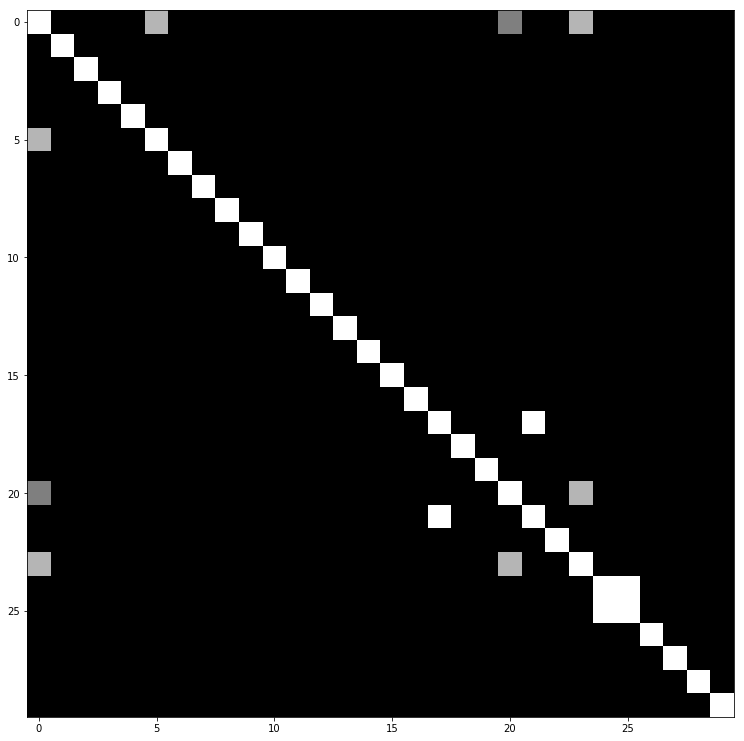

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
plt.imshow(similarity_weight.values[2300:2330,2300:2330], cmap='gray')
#plt.imshow(-similarity_weight.values[2200:2300,2200:2300], cmap='gray')
# plt.imshow(-similarity_weight.values, cmap='gray')
plt.show()

check%0

In [57]:
def notZeroPercent(matrix):
    all_value = matrix.shape[0]*matrix.shape[1]
    zero_value = sum(sum(~(matrix.values==0)))
    return zero_value*100/all_value

In [58]:
notZeroPercent(similarity_weight)

0.39157346145767696

กรองเอาค่าที่ น้อยกว่าthersholdออก

In [59]:
def prefiltering_of_neighbors(old_similar_table, thershold):
    new_similar_table = old_similar_table.copy()
    # Negative filtering & Thershold filtering
    new_similar_table[new_similar_table < thershold] = 0
    return new_similar_table

In [80]:
notZeroPercent(prefiltering_of_neighbors(similarity_weight, 0.1))

0.38299464398235666

In [90]:
prefiltering_similarity_weight = prefiltering_of_neighbors(similarity_weight, 0.8)
prefiltering_similarity_weight

,21,22,1042,2082,2085,2142,2233,2243,2316,2320,...,205842,206022,206062,206182,206262,206362,206462,206742,206784,206883
21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2082,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2085,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2142,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2233,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


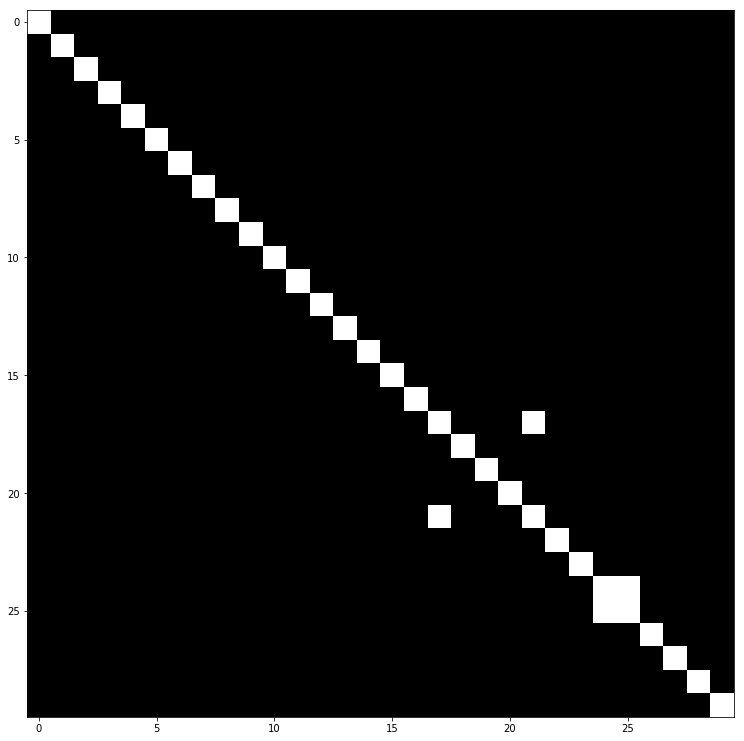

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,13))
plt.imshow(prefiltering_similarity_weight.values[2300:2330,2300:2330], cmap='gray')
#plt.imshow(-prefiltering_similarity_weight.values, cmap='gray')
# plt.imshow(-similarity_weight.values, cmap='gray')
plt.show()

Predicted ว่าซื้อ(1) ไม่ซื้อ(0)

In [31]:
def cs_classification_predicted_score_user_based(pivot_table,weight,output_set):
    # initial variable
    score_table = pivot_table.copy()
    number_of_user = score_table.shape[0]
    
    # get NaN index
    nan_index = np.argwhere(np.isnan(score_table).values)
    
    # for loop to predict each NaN and fill value to it       
    for nan_pos in nan_index:
        r_score = np.array([])
        u,i = nan_pos[0],nan_pos[1]
        ru = score_table.values[:,i]
        wu = weight.values[u]
        wu[u] = 0
        
        for r in output_set:
            r_array,delta_r = np.array([r]*number_of_user),np.array([0]*number_of_user)
            delta_r[r_array == ru]  = 1
            vir = sum(wu*delta_r)
            r_score = np.append(r_score, vir)
        
        score_table.values[u][i] = output_set[np.argmax(r_score)]
        
    return score_table

In [24]:
pivot.shape[0]


5410

In [25]:
np.unique(cosine_similarity_between_user(pivot))

array([0.        , 0.01445183, 0.01464583, 0.01506188, 0.01791436,
       0.01838658, 0.01911798, 0.01967224, 0.01967604, 0.01993631,
       0.02023612, 0.02026102, 0.02050662, 0.0208696 , 0.0209427 ,
       0.02099803, 0.02158664, 0.02160679, 0.02160679, 0.02167775,
       0.0218687 , 0.02196874, 0.02207554, 0.02214037, 0.02227177,
       0.02237187, 0.02262814, 0.02285752, 0.02300219, 0.02326211,
       0.023338  , 0.02341465, 0.02358333, 0.02372895, 0.02380952,
       0.02391824, 0.02423931, 0.02437575, 0.0243975 , 0.0244558 ,
       0.02470831, 0.02478408, 0.02514977, 0.02536731, 0.0255655 ,
       0.02564946, 0.02575131, 0.02599376, 0.02600255, 0.02620712,
       0.02627035, 0.02631579, 0.02635231, 0.02646281, 0.02666904,
       0.02678358, 0.02680281, 0.02686077, 0.0269484 , 0.0270369 ,
       0.02711631, 0.02718636, 0.02737928, 0.02739983, 0.02746175,
       0.02777778, 0.02782074, 0.02786391, 0.02799463, 0.02804964,
       0.02817181, 0.02817181, 0.02849014, 0.0285133 , 0.02858

In [47]:
test_sw = cosine_similarity_between_user_user_based(pivot)
test_prefiltering_sw = prefiltering_of_neighbors(test_sw, 0.5)
test_predicted_table = cs_classification_predicted_score_user_based(pivot,test_prefiltering_sw,[0,1])
test_predicted_table

KeyboardInterrupt: 

In [ ]:
predicted_table_T = predicted_table.T

In [165]:
np.unique(test_predicted_table)

array([0, 1])

In [172]:
def item_list_from_user(predicted_score_table,user_id):
    user_items = pd.DataFrame(predicted_score_table.loc[user_id])
    user_items_sorted = user_items.sort_values(by=[user_id], ascending=False)
    item_id_lists = user_items_sorted.index.values
    return item_id_lists

def new_item_list_from_user(new_score_table, old_score_table, user_id):
    only_new_item = new_score_table[np.isnan(old_score_table)]
    print(only_new_item)
    user_items = pd.DataFrame(only_new_item.loc[user_id])
    user_items_sorted = user_items.sort_values(by=[user_id], ascending=False)
    item_id_lists = user_items_sorted[(user_items_sorted>0).values].index.values
    return item_id_lists

def user_list_from_similarity(similar_table,item_id):
    item_lists = pd.DataFrame(similar_table.loc[item_id])
    items_sorted = item_lists.sort_values(by=[item_id], ascending=False)
    items_sorted[item_id][item_id] = 0
    item_id_lists = items_sorted[(items_sorted>0).values].index.values
    return item_id_lists

In [167]:
pivot.shape[0]*pivot.shape[1]

8205625

In [168]:
item_list = item_list_from_user(predicted_table_T,'100085')


In [169]:
item_list_str = np.array([str(x) for x in item_list])

<img src="../../../2_data/img/19000158.jpg">

Populating the interactive namespace from numpy and matplotlib


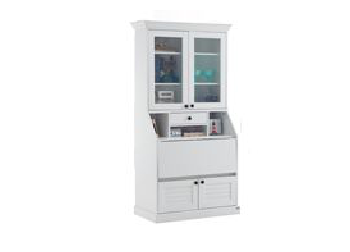

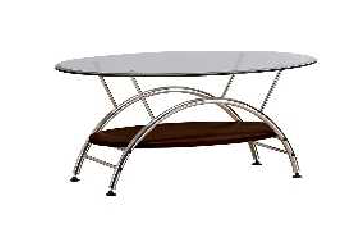

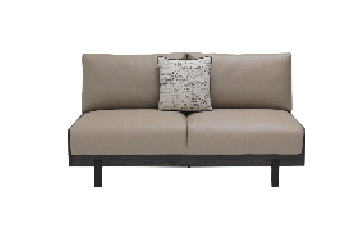

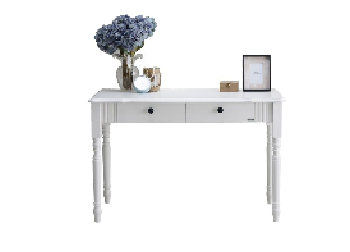

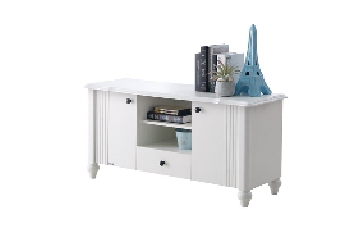

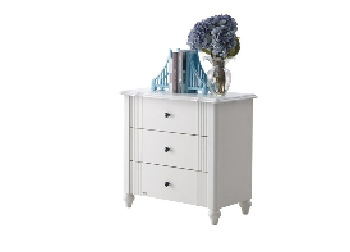

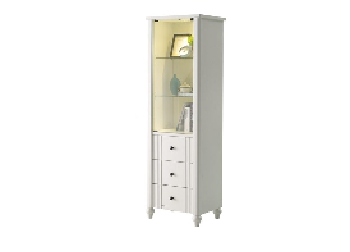

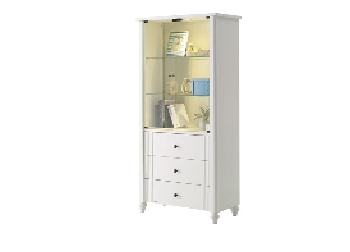

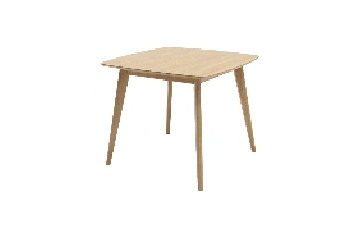

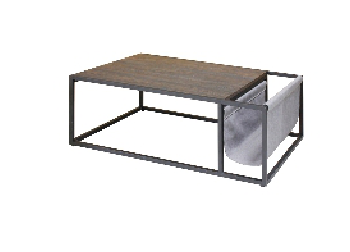

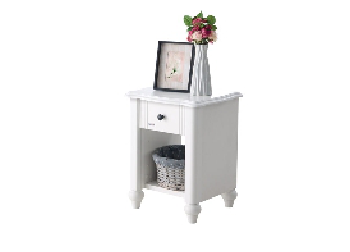

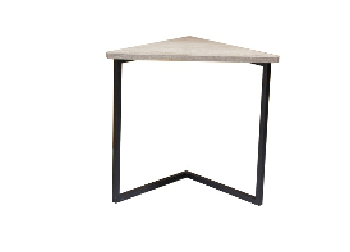

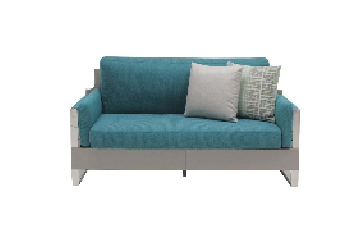

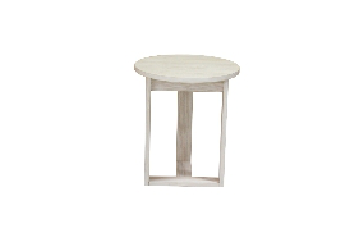

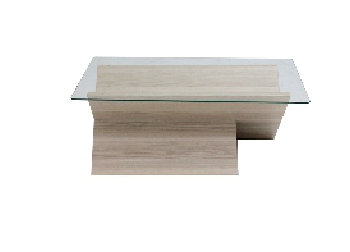

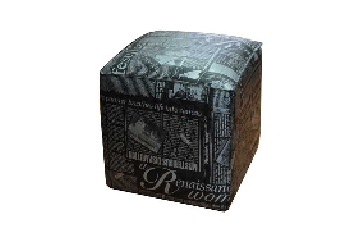

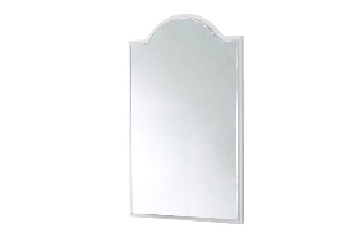

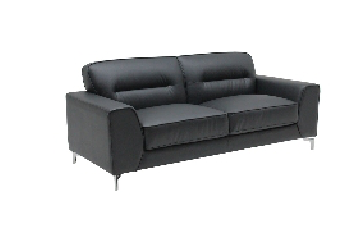

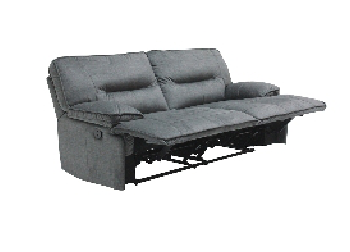

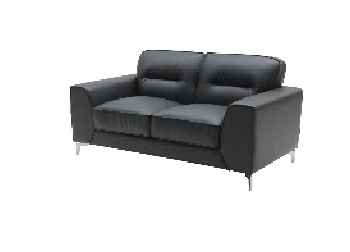

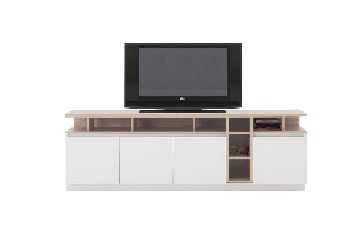

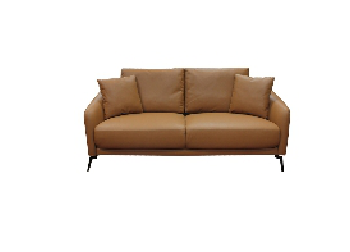

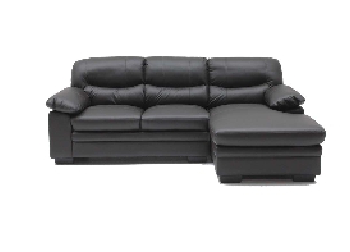

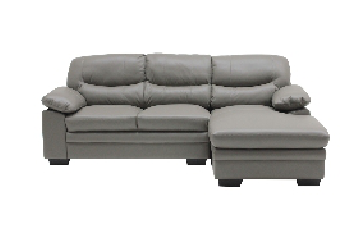

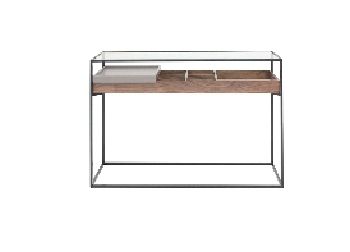

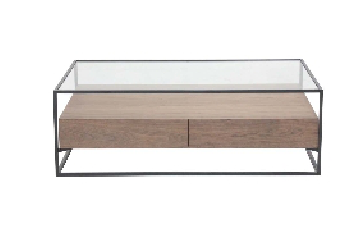

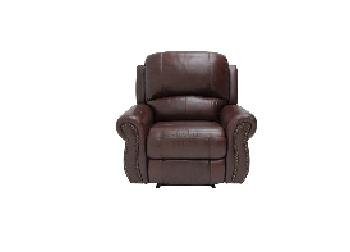

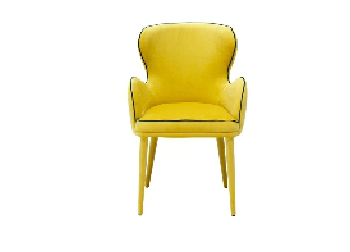

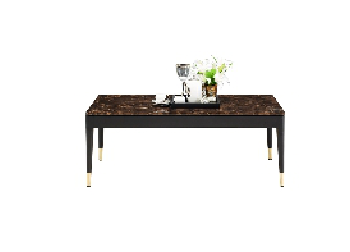

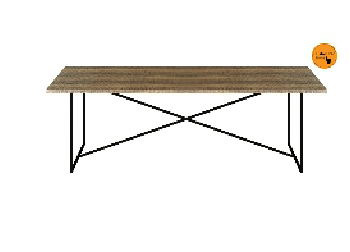

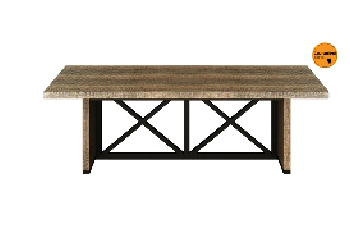

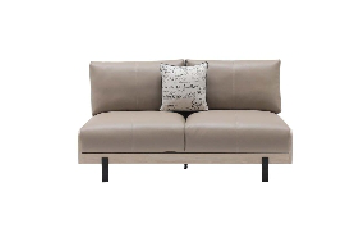

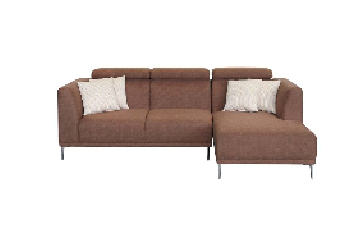

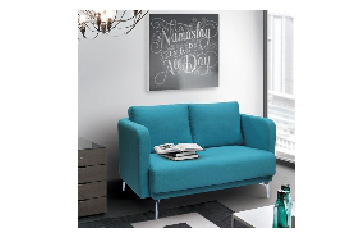

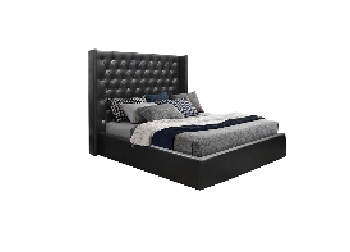

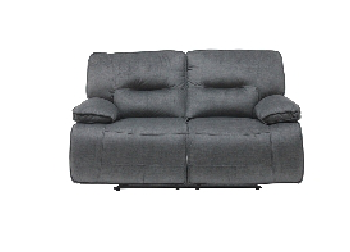

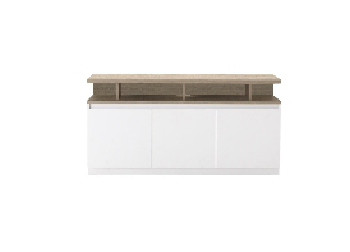

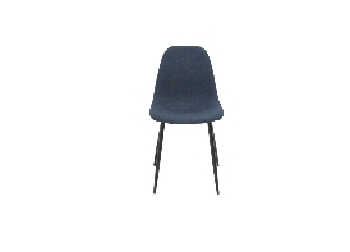

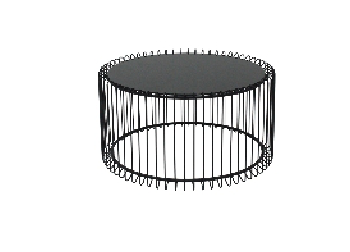

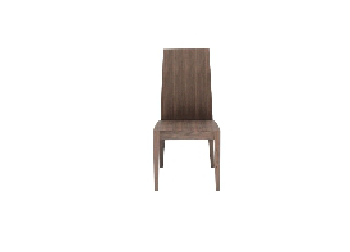

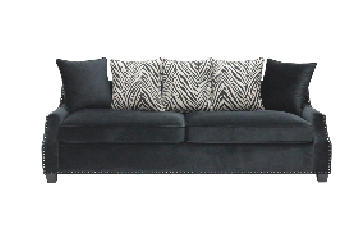

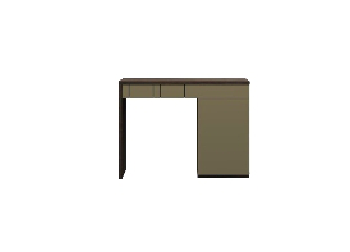

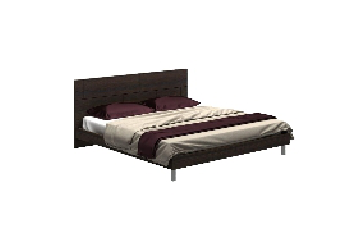

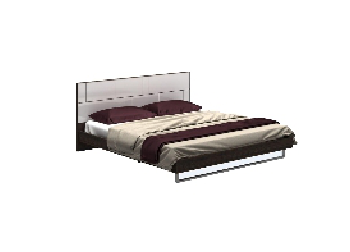

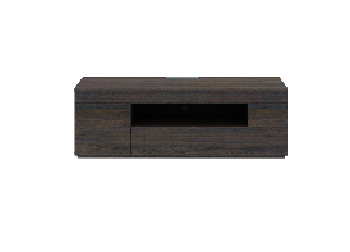

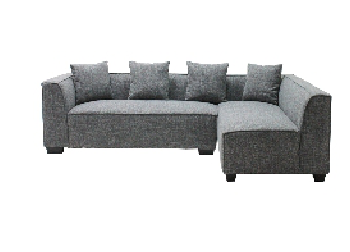

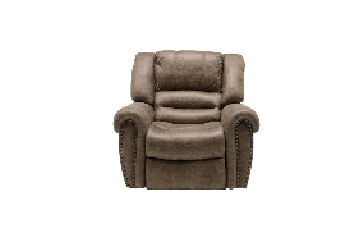

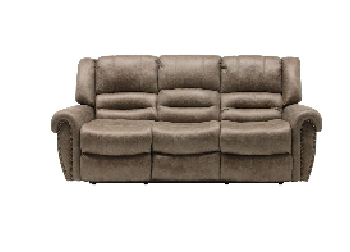

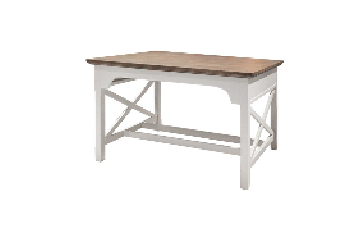

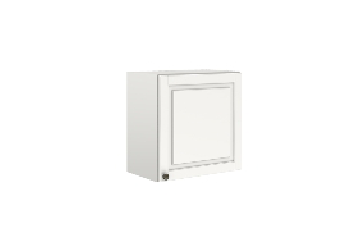

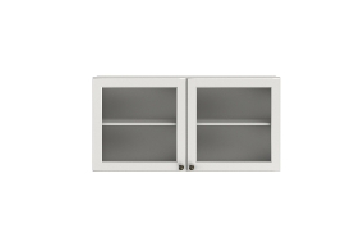

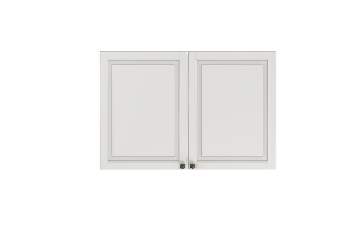

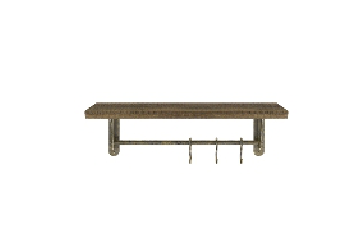

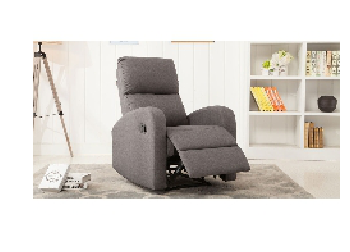

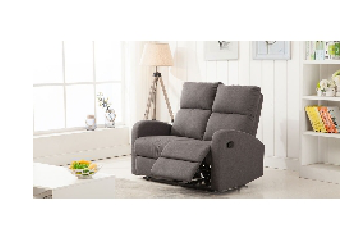

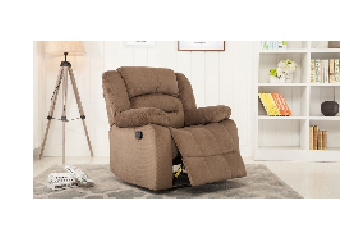

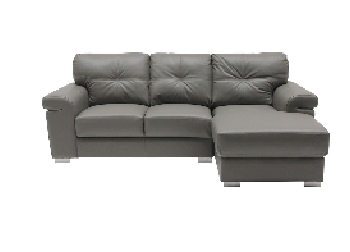

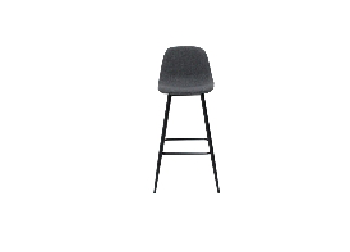

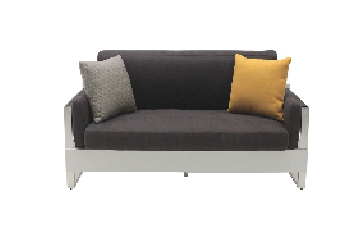

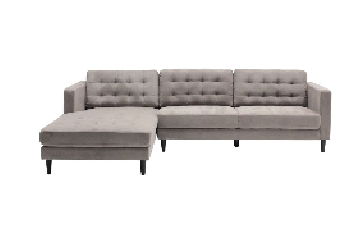

KeyboardInterrupt: 

In [140]:
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for item in item_list_str:
    try:
        img = mpimg.imread('../../../2_data/img/'+item+'.jpg')
        imgplot = plt.imshow(img)
        plt.show(axis('off'))
    except (FileNotFoundError):
        pass


In [177]:
pivot_T = pivot.T
pivot_T.head()

MATNR,19000158,19000346,19000900,19005144,19008811,19008833,19009152,19009245,19011555,19012447,...,59015400,59015657,59015667,59015674,59015710,59015711,59015916,59016460,59016463,59016513
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
100085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
new_item_list_from_user(predicted_table_T,pivot_T, '1042')

MATNR        19000158  19000346  19000900  19005144  19008811  19008833  \
CUSTOMER_ID                                                               
100085            0.0       0.0       0.0       0.0       0.0       0.0   
100522            0.0       0.0       0.0       0.0       0.0       0.0   
100622            0.0       0.0       0.0       0.0       0.0       0.0   
100683            0.0       0.0       0.0       0.0       0.0       0.0   
100684            0.0       0.0       0.0       0.0       0.0       0.0   
100806            0.0       0.0       0.0       0.0       0.0       0.0   
100822            0.0       0.0       0.0       0.0       0.0       0.0   
100843            0.0       0.0       0.0       0.0       0.0       0.0   
100862            0.0       0.0       0.0       0.0       0.0       0.0   
100982            0.0       0.0       0.0       0.0       0.0       0.0   
101082            0.0       0.0       0.0       0.0       0.0       0.0   
101106            0.0    

array([], dtype=int64)

In [60]:
small_set = grouped[0:100]

In [61]:
small_pivot = small_set.pivot(index='CUSTOMER_ID', columns='MATNR', values='QUANTITY')
print(small_pivot.shape)
small_pivot

(4, 97)


MATNR,19023492,19026283,19026309,19037281,19040788,19042767,19042776,19047928,19049635,19050212,...,59011045,59011110,59011117,59011144,59011149,59011308,59011411,59011482,59011537,59015402
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
21,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN
1042,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0
2082,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
test_sw2 = cosine_similarity_between_user_user_based(small_pivot)
test_prefiltering_sw2 = prefiltering_of_neighbors(test_sw2, 0.1)
test_predicted_table2 = cs_classification_predicted_score_user_based(small_pivot,test_prefiltering_sw2,[0,1])
test_predicted_table2

MATNR,19023492,19026283,19026309,19037281,19040788,19042767,19042776,19047928,19049635,19050212,...,59011045,59011110,59011117,59011144,59011149,59011308,59011411,59011482,59011537,59015402
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
21,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1042,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2082,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
